<p style="font-size:35px;text-align:center"> <b>Tab Food Investments Revenue Prediction Problem</b> </p>

## Problem Statement

New restaurant sites take large investments of time and capital to get up and running. When the wrong location for a restaurant brand is chosen, the site closes within 18 months and operating losses are incurred. 

Finding a mathematical model to increase the effectiveness of investments in new restaurant sites would allow TFI to invest more in other important business areas, like sustainability, innovation, and training for new employees. Using demographic, real estate, and commercial data, this competition challenges you to predict the annual restaurant sales of 100,000 regional locations.

## Data

__Id__ : Restaurant id. <br> 
__Open Date__ : opening date for a restaurant <br>
__City__ : City that the restaurant is in. Note that there are unicode in the names. <br>
__City Group__: Type of the city. Big cities, or Other. <br>
__Type__: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile  <br>
__P1, P2 - P37__: There are three categories of these obfuscated data. __Demographic data__ are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. __Real estate data__ mainly relate to the m2 of the location, front facade of the location, car park availability. __Commercial data__ mainly include the existence of points of interest including schools, banks, other QSR operators. <br>
__Revenue__: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. <br>

## ML Problem Formulation

<p style="font-size:17px;"> <b>Objectives</b> </p>

1) To predict the Revenue of each restaurant based on the given features <br>
2) Challenge ahead : To make sense out of the anonymized data

<p style="font-size:17px;"> <b>Metrics</b> </p>

1) Root Mean Squared Error

In [1]:
%matplotlib inline

# Data wrapper libraries
import pandas as pd
import numpy as np
from collections import Counter

#Data Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.markers import MarkerStyle
import seaborn as sns

#Date time Libraries
import time
import datetime

In [2]:
TFI_data_train = pd.read_csv("C:/Users/IBM_ADMIN/Desktop/appliedai/TFI_Restaurant/train.csv")
TFI_data_test = pd.read_csv("C:/Users/IBM_ADMIN/Desktop/appliedai/TFI_Restaurant/test.csv")

In [251]:
print("size of train data",TFI_data_train.shape)
print("size of test data",TFI_data_test.shape)

size of train data (137, 43)
size of test data (100000, 42)


In [252]:
TFI_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

##### Uni-Variate Analysis: Non-Obfuscated Features

Three categorical variables "City","City Group","Type". Let's take a look

In [253]:
TFI_data_train.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [254]:
TFI_data_train["Citygroup"]=TFI_data_train["City Group"]
TFI_data_train.drop("City Group",axis=1)
TFI_data_train=TFI_data_train[['Id', 'Open Date', 'City', 'Citygroup', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue']]

In [255]:
TFI_data_test["Citygroup"]=TFI_data_test["City Group"]
TFI_data_test.drop("City Group",axis=1)
TFI_data_test=TFI_data_test[['Id', 'Open Date', 'City', 'Citygroup', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37']]

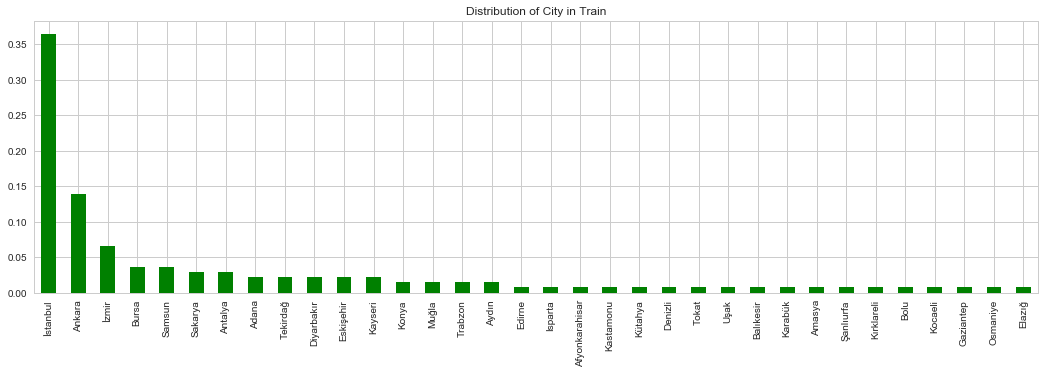

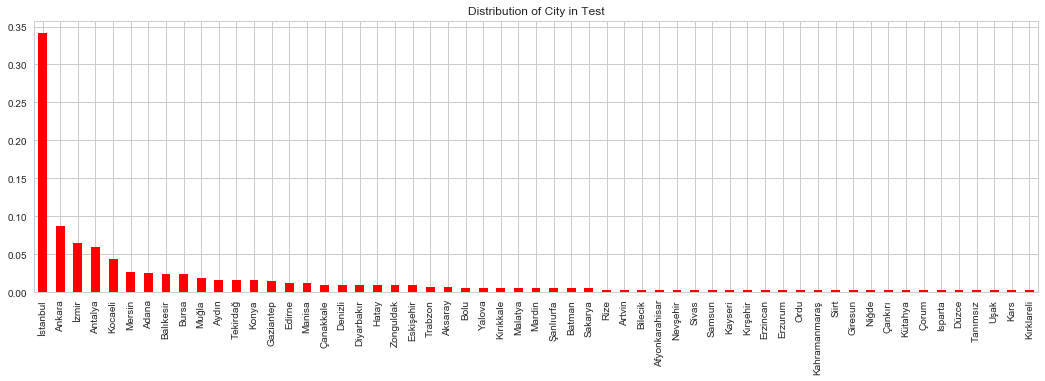

In [256]:
plt.figure(figsize=(18,5))
sns.set_style("whitegrid")
(TFI_data_train.City.value_counts()/len(TFI_data_train)).plot(title="Distribution of City in Train",kind='bar',color='green')
plt.show()
plt.figure(figsize=(18,5))
(TFI_data_test.City.value_counts()/len(TFI_data_test)).plot(title="Distribution of City in Test",kind='bar',color='red')
plt.show()

<p style="font-size:15px"> The presence of some cities in train is not found in test and vice versa. Let's take a look. </p>

In [257]:
cnotintest=[]
cnotintrain=[]
a=TFI_data_train.City.unique()
b=TFI_data_test.City.unique()
for i in a:
    if not i in b:
        cnotintest.append(i)

for i in b:
    if not i in a:
        cnotintrain.append(i)

In [258]:
print("Cities in Test but not in Train are",len(cnotintrain))
print(cnotintrain)
print("Cities in Train but not in Test are",len(cnotintest))
print(cnotintest)

Cities in Test but not in Train are 29
['Niğde', 'Rize', 'Düzce', 'Hatay', 'Erzurum', 'Mersin', 'Zonguldak', 'Malatya', 'Çanakkale', 'Kars', 'Batman', 'Bilecik', 'Giresun', 'Sivas', 'Kırıkkale', 'Mardin', 'Erzincan', 'Manisa', 'Kahramanmaraş', 'Yalova', 'Tanımsız', 'Kırşehir', 'Aksaray', 'Nevşehir', 'Çorum', 'Ordu', 'Artvin', 'Siirt', 'Çankırı']
Cities in Train but not in Test are 6
['Tokat', 'Elazığ', 'Kastamonu', 'Karabük', 'Amasya', 'Osmaniye']


In [259]:
TFI_data_train["Citygroup"].where(TFI_data_train["City"].isin(cnotintest)).unique()

array([nan, 'Other'], dtype=object)

In [260]:
TFI_data_test["Citygroup"].where(TFI_data_test["City"].isin(cnotintrain)).unique()

array(['Other', nan], dtype=object)

In [261]:
TFI_data_train["Type"].where(TFI_data_train["City"].isin(cnotintest)).unique()

array([nan, 'IL', 'FC'], dtype=object)

In [262]:
TFI_data_test["Type"].where(TFI_data_test["City"].isin(cnotintrain)).unique()

array(['FC', nan, 'IL', 'MB', 'DT'], dtype=object)

In [263]:
a=TFI_data_test.where(TFI_data_test["City"].isin(cnotintrain))

In [264]:
len(a[(a["Type"]=='MB') | (a["Type"]=='DT')])

373

* The cities present in Test but not in Train and vice-versa are represented numerically.
* These cities are further grouped with "City Group". Cities in either datasets belong to "Others"
* When these cities in Test set are grouped with "Type". Cities in train belonged to 'IL' and 'FC' whereas in the test they belong to 'FC','IL','MB','DT'
* "MB" and "DT" of the above cities constitues only 373 datapoints out of 100000. Hence they can be ignored.
  </n>




* These cities can be renamed "UNK' in either of the datasets

In [265]:
TFI_data_test.loc[TFI_data_test.City.isin(cnotintrain), 'City'] = 'UNK'

In [266]:
TFI_data_test.City.value_counts()

İstanbul          34087
UNK               16243
Ankara             8720
İzmir              6465
Antalya            5911
Kocaeli            4364
Adana              2514
Balıkesir          2463
Bursa              2441
Muğla              1823
Aydın              1617
Tekirdağ           1577
Konya              1576
Gaziantep          1487
Edirne             1230
Denizli             964
Diyarbakır          954
Eskişehir           900
Trabzon             660
Bolu                631
Şanlıurfa           609
Sakarya             604
Afyonkarahisar      331
Samsun              324
Kayseri             323
Isparta             304
Kütahya             304
Uşak                293
Kırklareli          281
Name: City, dtype: int64

In [267]:
TFI_data_train.loc[TFI_data_train.City.isin(cnotintest), 'City'] = 'UNK'
TFI_data_train.City.value_counts()

İstanbul          50
Ankara            19
İzmir              9
UNK                6
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Tekirdağ           3
Diyarbakır         3
Adana              3
Eskişehir          3
Kayseri            3
Konya              2
Muğla              2
Aydın              2
Trabzon            2
Isparta            1
Afyonkarahisar     1
Şanlıurfa          1
Kütahya            1
Denizli            1
Kırklareli         1
Uşak               1
Edirne             1
Gaziantep          1
Balıkesir          1
Bolu               1
Kocaeli            1
Name: City, dtype: int64

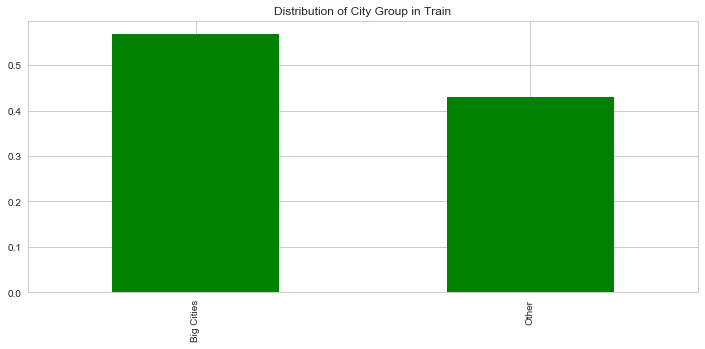

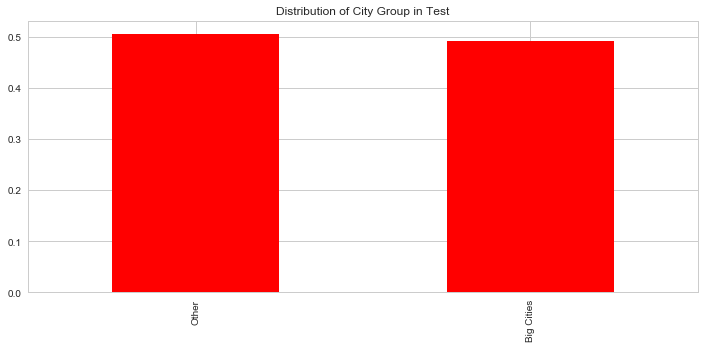

In [268]:
plt.figure(figsize=(12,5))
sns.set_style("whitegrid")
(TFI_data_train.Citygroup.value_counts()/len(TFI_data_train)).plot(title="Distribution of City Group in Train",kind='bar',color='green')
plt.show()
plt.figure(figsize=(12,5))
(TFI_data_test.Citygroup.value_counts()/len(TFI_data_test)).plot(title="Distribution of City Group in Test",kind='bar',color='red')
plt.show()

The distributions of City Group are almost similiar in both the datasets.

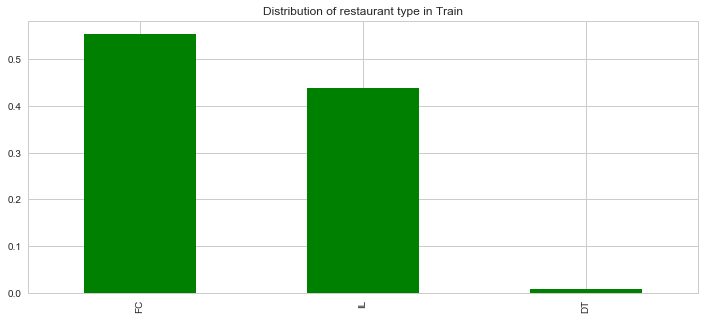

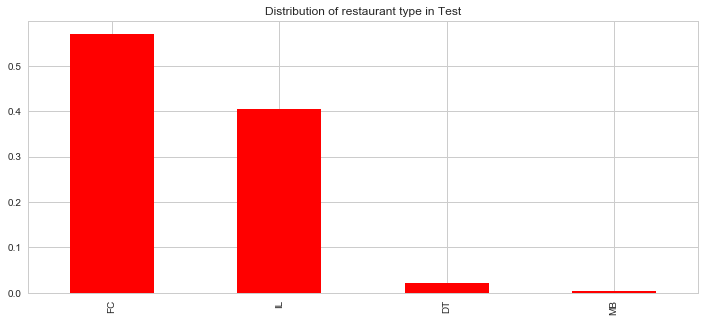

In [269]:
plt.figure(figsize=(12,5))
sns.set_style("whitegrid")
(TFI_data_train.Type.value_counts()/len(TFI_data_train)).plot(title="Distribution of restaurant type in Train",kind='bar',color='green')
plt.show()
plt.figure(figsize=(12,5))
(TFI_data_test.Type.value_counts()/len(TFI_data_test)).plot(title="Distribution of restaurant type in Test",kind='bar',color='red')
plt.show()

* The prevalence of restaurant types "DT" and "MB" is extremely rare. Hence, They can be ignored.
* The percentage distribution of "FC" and "IL" are approximately same.

In [270]:
TFI_data_test["Open Date"]=pd.to_datetime(TFI_data_test["Open Date"])
TFI_data_test["DayssinceInception"]=(datetime.date.today()-TFI_data_test["Open Date"]).dt.days
del TFI_data_test["Open Date"]

In [271]:
TFI_data_train["Open Date"]=pd.to_datetime(TFI_data_train["Open Date"])
TFI_data_train["DayssinceInception"]=(datetime.date.today()-TFI_data_train["Open Date"]).dt.days
del TFI_data_train["Open Date"]

In [272]:
TFI_data_train.head(3)

,Id,City,Citygroup,Type,P1,P2,P3,P4,P5,P6,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,DayssinceInception
0,0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,5,3,4,5,5,4,3,4,5653753.0,6954
1,1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,0,0,0,0,0,0,0,0,6923131.0,3820
2,2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,0,0,0,0,0,0,0,0,2055379.0,1970


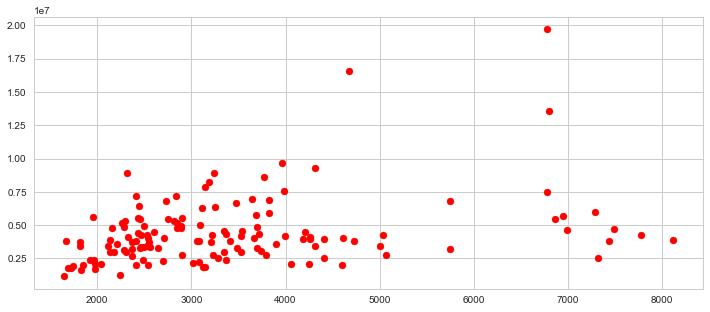

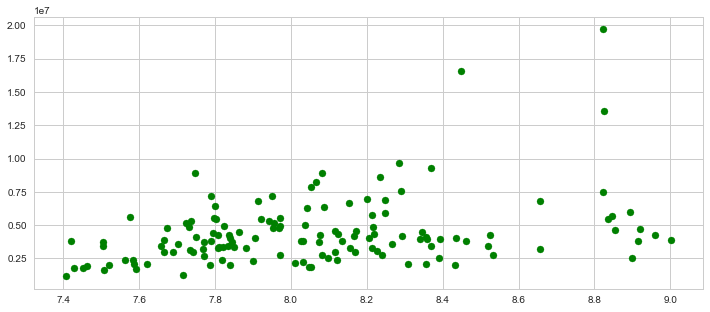

In [273]:
plt.figure(figsize=(12,5))
sns.set_style("whitegrid")
plt.scatter(x=TFI_data_train.DayssinceInception,y=TFI_data_train.revenue,c='r')
plt.show()

plt.figure(figsize=(12,5))
sns.set_style("whitegrid")
plt.scatter(x=np.log(TFI_data_train.DayssinceInception),y=TFI_data_train.revenue,c='g')
plt.show()

* The "Dayssinceinception" feature has a linearly increasing relationship with the revenue.
* Applying the Log to "Dayssinceinception" not only preserve the linearly increasing relationship with the revenue but also scale the values.

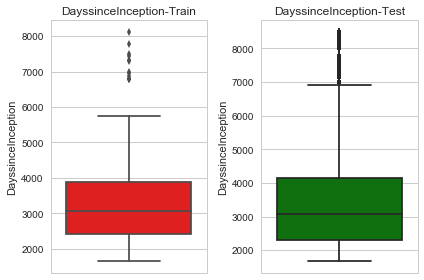

In [274]:
plt.figure(figsize=(10,6))
f, (ax1, ax2) = plt.subplots(1,2)
sns.boxplot(TFI_data_train.DayssinceInception,ax=ax1,orient='v',color='r')
ax1.set_title("DayssinceInception-Train")
sns.boxplot(TFI_data_test.DayssinceInception,ax=ax2,orient='v',color='g')
ax2.set_title("DayssinceInception-Test")
f.tight_layout()

In [275]:
np.log(TFI_data_test.DayssinceInception).describe()

count    100000.000000
mean          8.085997
std           0.434213
min           7.419980
25%           7.744570
50%           8.031710
75%           8.331827
max           9.046055
Name: DayssinceInception, dtype: float64

In [276]:
np.log(TFI_data_train.DayssinceInception).describe()

count    137.000000
mean       8.060480
std        0.378628
min        7.407318
25%        7.789040
50%        8.032685
75%        8.267449
max        9.001962
Name: DayssinceInception, dtype: float64

The statistical figures are closely same for both Test and Train

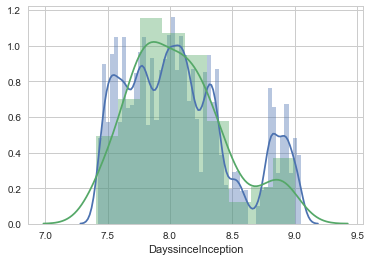

In [277]:
sns.distplot(np.log(TFI_data_test.DayssinceInception),label='Test')
sns.distplot(np.log(TFI_data_train.DayssinceInception),label='Train')

The distributions are closely similiar.

In [278]:
TFI_data_train["DayssinceInception"]=np.log(TFI_data_train.DayssinceInception)
TFI_data_test["DayssinceInception"]=np.log(TFI_data_test.DayssinceInception)

In [470]:
a=(TFI_data_train==0).astype(int).sum(axis=0)
a

Id                     1
City                   0
Citygroup              0
Type                   0
P1                     0
P2                     0
P3                     1
P4                     0
P5                     0
P6                     0
P7                     0
P8                     0
P9                     0
P10                    0
P11                    0
P12                    0
P13                    0
P14                   87
P15                   87
P16                   87
P17                   87
P18                   87
P19                    0
P20                    0
P21                    0
P22                    0
P23                    0
P24                   87
P25                   87
P26                   87
P27                   88
P28                    0
P29                    2
P30                   87
P31                   87
P32                   87
P33                   87
P34                   87
P35                   87
P36                   87


In [281]:
b=(TFI_data_test==0).astype(int).sum(axis=0)
b

Id                        1
City                      0
Citygroup                 0
Type                      0
P1                        0
P2                        0
P3                      318
P4                        0
P5                        0
P6                        0
P7                        0
P8                        0
P9                        0
P10                       0
P11                       0
P12                       0
P13                       0
P14                   65734
P15                   65772
P16                   66094
P17                   65792
P18                   65980
P19                       0
P20                       0
P21                       0
P22                       0
P23                       0
P24                   65766
P25                   65738
P26                   65784
P27                   66193
P28                       0
P29                    3083
P30                   65596
P31                   65566
P32                 

In [282]:
df1 = pd.DataFrame(data=a.index, columns=['cols'])
df2 = pd.DataFrame(data=a.values/len(TFI_data_train), columns=['cnt_trn'])
df_trn = pd.merge(df1, df2, left_index=True, right_index=True)

In [283]:
df11 = pd.DataFrame(data=b.index, columns=['cols'])
df21 = pd.DataFrame(data=b.values/len(TFI_data_test), columns=['cnt_tst'])
df_tst = pd.merge(df11, df21, left_index=True, right_index=True)

In [284]:
df_zeros = pd.merge(df_trn, df_tst, left_index=True, right_index=True)

In [285]:
df_zeros.drop("cols_y",axis=1)

,cols_x,cnt_trn,cnt_tst
0,Id,0.007299,0.00001
1,City,0.000000,0.00000
2,Citygroup,0.000000,0.00000
3,Type,0.000000,0.00000
4,P1,0.000000,0.00000
5,P2,0.000000,0.00000
6,P3,0.007299,0.00318
7,P4,0.000000,0.00000
8,P5,0.000000,0.00000
9,P6,0.000000,0.00000


The thorough comparison of P features is performed w.r.t to the distribution of zeros and non-zeros in each feature. Interestingly Both Test and Train display the same ratio except __P3__ and __P29__

Sample CDF plot of a feature to further reinstate the uniformity we observed.

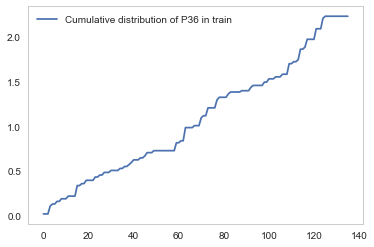

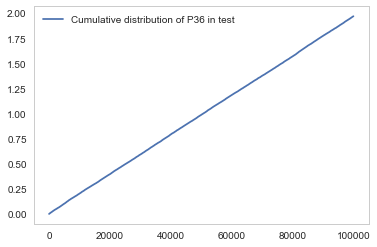

In [471]:
c = np.cumsum(TFI_data_train.P36.values/len(TFI_data_train))
sns.set_style("whitegrid")
plt.plot(c,label='Cumulative distribution of P36 in train')
plt.grid()
plt.legend()
plt.show()

c = np.cumsum(TFI_data_test.P36.values/len(TFI_data_test))
sns.set_style("whitegrid")
plt.plot(c,label='Cumulative distribution of P36 in test')
plt.grid()
plt.legend()
plt.show()

50% mark of both Test and Train occured at 1.0

In [287]:
TFI_data_train=TFI_data_train[TFI_data_train.Id!=16]
# Removal of the only outlier

In [288]:
TFI_data_train["revenue"]=np.log(TFI_data_train.revenue)
#Since revenue is the approximate lognormal distribution and can be checked from the below plot

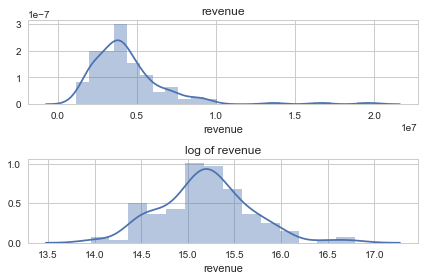

In [474]:
plt.figure(figsize=(10,6))
f, (ax1, ax2) = plt.subplots(2)
sns.distplot(TFI_data_train["revenue"],ax=ax1)
ax1.set_title("revenue")
sns.distplot(np.log(TFI_data_train["revenue"]),ax=ax2)
ax2.set_title("log of revenue")
f.tight_layout()

In [322]:
TFI_data_train.revenue[0]

15.547830130395319

In [332]:
import math
math.e**TFI_data_train.revenue[0]

5653752.9999999981

In [333]:
TFI_data_train.columns

Index(['Id', 'City', 'Citygroup', 'Type', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
       'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue', 'DayssinceInception'],
      dtype='object')

In [334]:
TFI_data_train_fin = TFI_data_train[['Citygroup', 'Type','DayssinceInception','P1', 'P2','P4', 'P5', 'P6',
       'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
       'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26',
       'P27', 'P28', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36',
       'P37', 'revenue']]

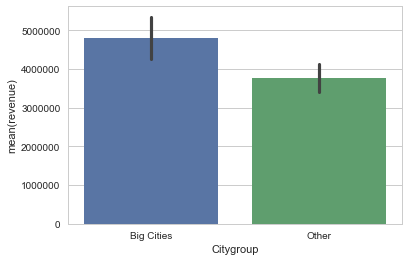

In [338]:
sns.barplot(y=math.e ** TFI_data_train["revenue"],x=TFI_data_train_fin["Citygroup"])

Since Revenue of Big cities is more than that of others. Assigning 1 to Big Cities and small to Others

In [351]:
TFI_data_test["Citygroup"]=TFI_data_test.Citygroup.replace(to_replace="Big Cities",value="1")
TFI_data_test["Citygroup"]=TFI_data_test.Citygroup.replace(to_replace="Other",value="0")
TFI_data_test["Citygroup"]=pd.to_numeric(TFI_data_test["Citygroup"])

In [343]:
TFI_data_train_fin.head(2)

,Citygroup,Type,DayssinceInception,P1,P2,P4,P5,P6,P7,P8,...,P28,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,1,IL,8.847072,4,5.0,4.0,2,2,5,4,...,2.0,5,3,4,5,5,4,3,4,15.547830
1,1,FC,8.248006,4,5.0,4.0,1,2,5,5,...,3.0,0,0,0,0,0,0,0,0,15.750379


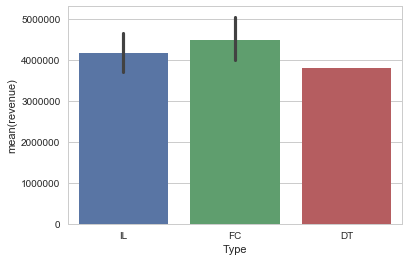

In [344]:
sns.barplot(y=math.e ** TFI_data_train["revenue"],x=TFI_data_train_fin["Type"])

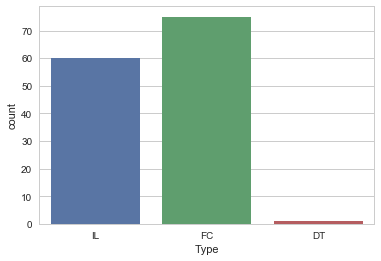

In [346]:
sns.countplot(TFI_data_train.Type)

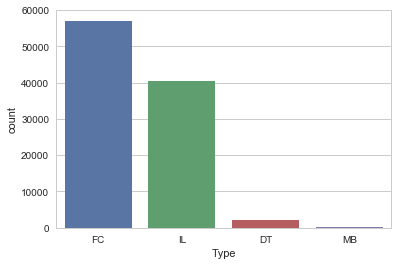

In [347]:
sns.countplot(TFI_data_test.Type)

* Creating Dummy variables for "Type" and deleting "Type_MB" and "Type_DT" in both Train and Test as they are extremely rare and would only add noise.
* Remove City from either datasets as It's already been made clear that the obfuscated features contain the geographical data as well

In [349]:
TFI_data_train_fin = pd.get_dummies(TFI_data_train_fin,columns=['Type'])

In [374]:
TFI_data_train_fin.head(3)

,Citygroup,DayssinceInception,Type_FC,Type_IL,P1,P2,P4,P5,P6,P7,...,P27,P28,P30,P31,P32,P33,P34,P35,P36,P37
0,1,8.847072,0,1,4,5.0,4.0,2,2,5,...,4.0,2.0,5,3,4,5,5,4,3,4
1,1,8.248006,1,0,4,5.0,4.0,1,2,5,...,0.0,3.0,0,0,0,0,0,0,0,0
2,0,7.585789,0,1,2,4.0,5.0,2,3,5,...,0.0,1.0,0,0,0,0,0,0,0,0


In [352]:
TFI_data_test = pd.get_dummies(TFI_data_test,columns=['Type'])

In [353]:
TFI_data_test.head(2)

,Id,City,Citygroup,P1,P2,P3,P4,P5,P6,P7,...,P33,P34,P35,P36,P37,DayssinceInception,Type_DT,Type_FC,Type_IL,Type_MB
0,0,0,0,1,4.0,4.0,4.0,1,2,5,...,0,0,0,0,0,7.918265,0,1,0,0
1,1,Konya,0,3,4.0,4.0,4.0,2,2,5,...,0,0,0,0,0,7.898040,0,0,1,0


In [355]:
TFI_data_test1=TFI_data_test.drop(["City","Type_DT","Type_MB"],axis=1)

In [369]:
TFI_data_test1=TFI_data_test1.drop(["Type_MB"],axis=1)

In [357]:
TFI_data_train_fin=TFI_data_train_fin.drop(["Type_DT"],axis=1)

In [359]:
TFI_data_train_fin.columns

Index(['Citygroup', 'DayssinceInception', 'P1', 'P2', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'revenue', 'Type_FC', 'Type_IL'],
      dtype='object')

In [370]:
TFI_data_test1.columns

Index(['Citygroup', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37',
       'DayssinceInception', 'Type_FC', 'Type_IL'],
      dtype='object')

In [375]:
TFI_data_train_fin = TFI_data_train_fin[['Citygroup', 'DayssinceInception','Type_FC', 'Type_IL','P1', 'P2', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37']]

In [378]:
train_rev = TFI_data_train.revenue
print(len(train_rev))
print(len(TFI_data_train_fin))

136
136


In [372]:
TFI_data_test1=TFI_data_test1[['Citygroup', 'DayssinceInception','Type_FC', 'Type_IL','P1', 'P2', 'P4', 'P5', 'P6', 'P7',
       'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17',
       'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27',
       'P28', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37']]

In [379]:
y=train_rev.values
x=TFI_data_train_fin.values

##### Test-Train Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=4)

##### Linear Model

In [430]:
#with all the features
import statsmodels.api as sm

# Note the difference in argument order
model = sm.OLS(y_train, x_train).fit()
y_trn_pred = math.e ** model.predict(x_train) 
y_test_pred = math.e ** model.predict(x_test) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1795.
Date:                Tue, 31 Jul 2018   Prob (F-statistic):           1.60e-90
Time:                        14:28:27   Log-Likelihood:                -73.229
No. Observations:                 108   AIC:                             224.5
Df Residuals:                      69   BIC:                             329.1
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0868      0.191     -0.455      0.651      -0.468       0.294
x2             1.3353      0.126     10.625      0.000       1.085       1.586
x3             1.5191      0.746      2.036      0.046       0.030       3.008
x4             1.4597      0.784      1.862      0.067      -0.105       3.024
x5             0.0115      0.096      0.120      0.905      -0.179       0.202
x6             0.0616      0.113      0.546      0.587      -0.163       0.286
x7             0.2516      0.152      1.655      0.103      -0.052       0.555
x8            -0.0354      0.124     -0.286      0.776      -0.282       0.212
x9            -0.0529      0.074     -0.714      0.478      -0.201       0.095
x10            0.0416      0.079      0.524      0.602      -0.117       0.200
x11            0.1270      0.151      0.844      0.402      -0.173       0.427
x12            0.0917      0.285      0.322      0.749      -0.477       0.660
x13           -0.7252      0.341     -2.129      0.037      -1.405      -0.046
x14            0.1119      0.085      1.323      0.190      -0.057       0.281
x15            0.0921      0.186      0.495      0.622      -0.279       0.463
x16            0.7491      0.322      2.329      0.023       0.107       1.391
x17           -0.0312      0.111     -0.280      0.780      -0.254       0.191
x18           -0.1747      0.134     -1.308      0.195      -0.441       0.092
x19            0.1343      0.157      0.853      0.397      -0.180       0.448
x20           -0.1183      0.101     -1.169      0.246      -0.320       0.084
x21           -0.2152      0.152     -1.411      0.163      -0.519       0.089
x22           -0.0683      0.045     -1.508      0.136      -0.159       0.022
x23           -0.0507      0.048     -1.066      0.290      -0.146       0.044
x24            0.0494      0.067      0.736      0.464      -0.084       0.183
x25           -0.0666      0.073     -0.915      0.364      -0.212       0.079
x26            0.0302      0.038      0.790      0.432      -0.046       0.107
x27            0.1487      0.166      0.894      0.374      -0.183       0.480
x28            0.1702      0.156      1.091      0.279      -0.141       0.481
x29           -0.2686      0.175     -1.535      0.129      -0.618       0.081
x30            0.0198      0.062      0.318      0.752      -0.105       0.144
x31            0.0902      0.085      1.061      0.292      -0.079       0.260
x32            0.0117      0.045      0.261      0.795      -0.078       0.101
x33            0.0981      0.087      1.125      0.264      -0.076       0.272
x34           -0.1247      0.077     -1.620      0.110      -0.278       0.029
x35            0.1548      0.126      1.230      0.223      -0.096       0.406
x36           -0.1713      0.107     -1.601      0.114      -0.385       0.042
x3

In [475]:
print("Root mean squared error achieved from Linear Model:",np.sqrt(mean_squared_error(math.e **y_test, y_test_pred)))

Root mean squared error achieved from Linear Model: 5757171.66292


##### Random Forest Regressor

In [432]:
from sklearn.ensemble import RandomForestRegressor
cls = RandomForestRegressor(n_estimators=1250)
cls.fit(x_train, y_train)
y_pred_trn_rf = cls.predict(x_train)
y_pred_test_rf = math.e ** cls.predict(x_test)

In [436]:
cls.score(x_train, y_train)

0.88392253441927027

In [433]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(cls,x_train, y_train, cv=5)
scores

array([ 0.19654268,  0.18847966,  0.22777372,  0.15873371, -0.1103713 ])

In [434]:
print("Root mean squared error achieved from RF:",np.sqrt(mean_squared_error(math.e **y_test, y_pred_test_rf)))

Root mean squared error achieved from RF: 1651321.84111


##### Ridge Regressor

In [446]:
from sklearn.grid_search import GridSearchCV
# Ridge model
model_grid = [{'normalize': [True, False], 'alpha': np.logspace(0,10)}]
ridge_clf = Ridge()

# Use a grid search and leave-one-out CV on the train set to find the best regularization parameter to use.
grid = GridSearchCV(ridge_clf, model_grid, cv=10, scoring='mean_squared_error')
grid.fit(x_train,y_train)

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADM

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADM

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADM

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADM

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADM

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADM

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADM

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADM

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADM

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADM

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADM

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADM

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADM

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADM

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADM

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\IBM_ADM

GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'normalize': [True, False], 'alpha': array([  1.00000e+00,   1.59986e+00,   2.55955e+00,   4.09492e+00,
         6.55129e+00,   1.04811e+01,   1.67683e+01,   2.68270e+01,
         4.29193e+01,   6.86649e+01,   1.09854e+02,   1.75751e+02,
         2.81177e+02,   4.49843e+02,   7.19686e+0...   9.54095e+08,   1.52642e+09,   2.44205e+09,   3.90694e+09,
         6.25055e+09,   1.00000e+10])}],
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [468]:
print("Root mean squared error achieved from Ridge:",np.sqrt(mean_squared_error(math.e **y_test, y_pred_ridge)))

Root mean squared error achieved from Ridge: 1691433.31179


In [476]:
print("Root mean squared error achieved from Linear Model:",np.sqrt(mean_squared_error(math.e **y_test, y_test_pred)))
print("Root mean squared error achieved from RF:",np.sqrt(mean_squared_error(math.e **y_test, y_pred_test_rf)))
print("Root mean squared error achieved from Ridge:",np.sqrt(mean_squared_error(math.e **y_test, y_pred_ridge)))

Root mean squared error achieved from Linear Model: 5757171.66292
Root mean squared error achieved from RF: 1651321.84111
Root mean squared error achieved from Ridge: 1691433.31179


<p style="font-size:17px;"> Random Forest has proved to be the best model among the three. Hence we are good to make the final submission with this model.

In [461]:
x_tst = TFI_data_test1.values

In [464]:
type(x_train)

numpy.ndarray

In [465]:
final_pred = math.e ** cls.predict(x_tst)

In [467]:
submission = pd.DataFrame({
        "Id": TFI_data_test["Id"],
        "Prediction": final_pred
    })
submission.to_csv('randomres.csv',header=True, index=False)

<p style="font-size:17px;"> The RMSE for my submission in Kaggle is 1757763.58777 which has a slight with the RMSE we got from Random Forest 1651321.84111.

Difference of apprx 100000. Added a noise of app 1 pt/test observation to the whole RMSE :)